In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# There are several categories in the Superstore sales data, i'll start from time series analysis and 
# forecasting for furniture sales.

# I have 4-year furniture sales data.

df = pd.read_excel(r"C:\Users\Admin\Anaconda3\DS-PYTHON\Datasets\Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
# data range
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [6]:
# Data Preprocessing
# This step includes removing columns we do not need, check missing values, 
# aggregate sales by date and so on.

In [7]:
cols = ['Row ID', 
        'Order ID', 
        'Ship Date', 
        'Ship Mode', 
        'Customer ID', 
        'Customer Name', 
        'Segment', 
        'Country', 
        'City', 
        'State', 
        'Postal Code', 
        'Region', 
        'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name', 
        'Quantity', 
        'Discount', 
        'Profit']

furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [8]:
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [9]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [10]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [11]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [12]:
# Indexing with Time Series Data
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [13]:
y = furniture['Sales'].resample('MS').mean()

In [14]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [15]:
# Visualizing Furniture Sales Time Series Data

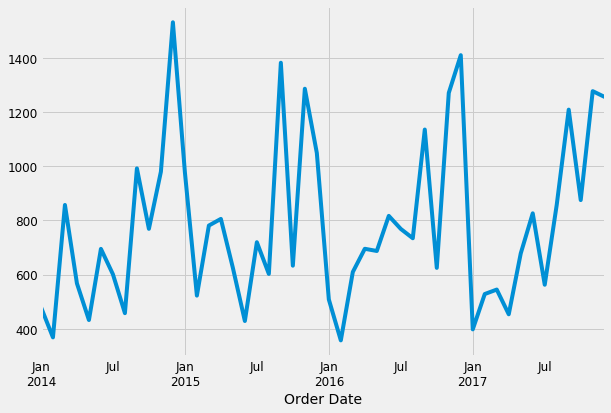

In [16]:
# Some distinguishable patterns appear when we plot the data. 

# The time-series has seasonality pattern, such as 
# - sales are always low at the beginning of the year 
# - high at the end of the year. 
# - There is always an upward trend within any single year with a couple of low months in the mid of the year.

y.plot(figsize=(9, 6))
plt.show()

In [ ]:
# I can also visualize my data using a method called time-series decomposition that 
# allows me to decompose my time series into three distinct components: 
# trend, seasonality, and noise.

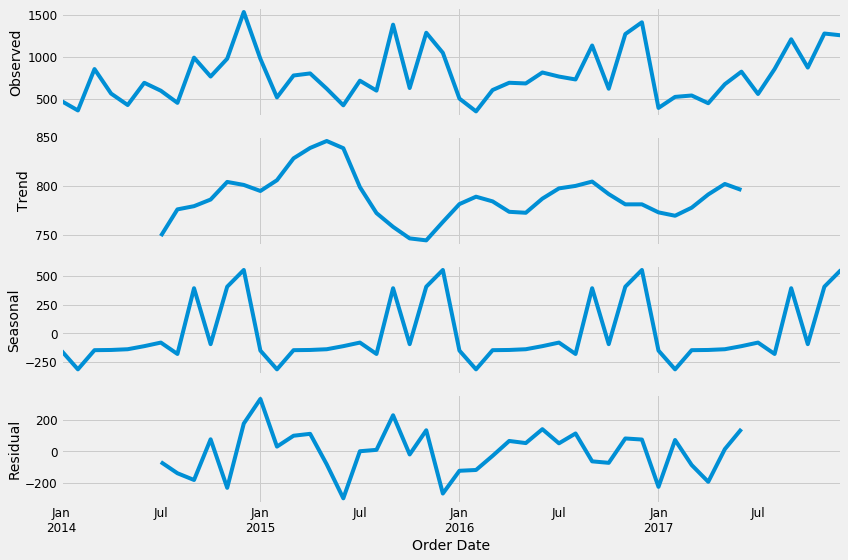

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# The plot above clearly shows that the sales of furniture is unstable, 
# along with its obvious seasonality.

In [ ]:
# Time series forecasting with ARIMA
# I am going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, 
# which stands for Autoregressive Integrated Moving Average.

# ARIMA models are denoted with the notation ARIMA(p, d, q). 
# These three parameters account for seasonality, trend, and noise in data:

In [50]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [51]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [54]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1665.1541834876464
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1376.5749459699152
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758096
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2774.3483948060048
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091255
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5330534520648
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:23538.785671529986
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946869
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1253.2109970846852
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1245.312426832414
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817146
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482808
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442803
ARIMA(0, 1, 1)x(1

In [55]:
# The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 297.78. 
# Therefore earning consideration to be optimal option.

In [56]:
# Fitting the ARIMA model

In [57]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

# model diagnostics suggests that the model residuals are near normally distributed.

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


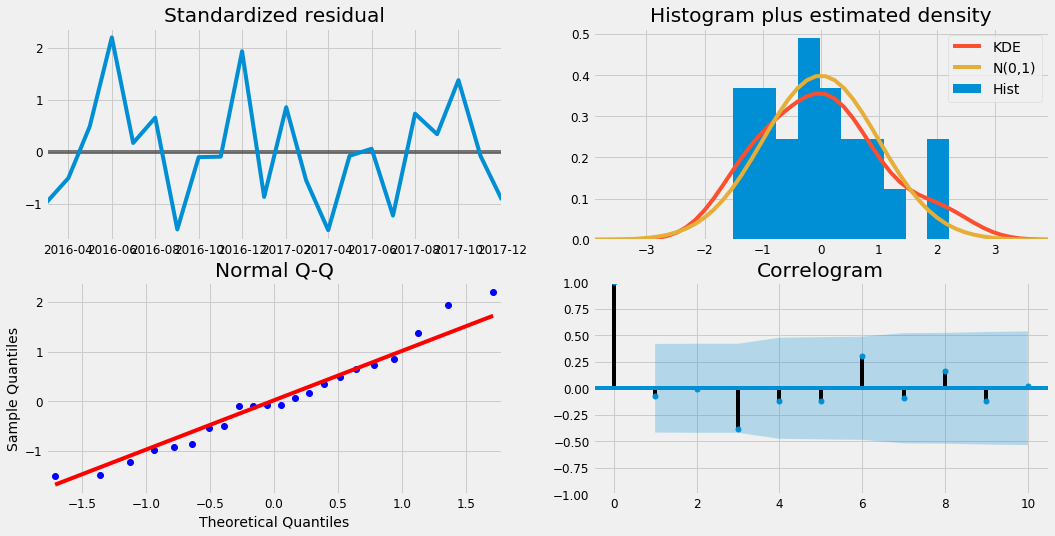

In [58]:
# I always run model diagnostics to investigate any unusual behavior.

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
# Validating forecasts
# To help understand the accuracy of the forecasts, 
# I compare predicted sales to real sales of the time series, and I set forecasts 
# to start at 2017–01–01 to the end of the data.

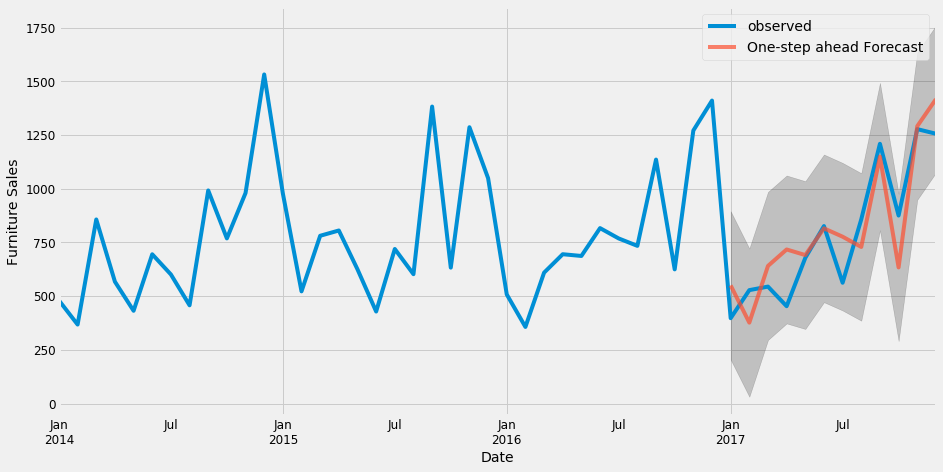

In [59]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# The line plot is showing the observed values compared to the rolling forecast predictions. 
# Overall, my forecasts align with the true values very well, showing an upward trend starts from the 
# beginning of the year and captured the seasonality toward the end of the year.

In [60]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.57


In [61]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


In [ ]:
# In statistics, the mean squared error (MSE) of an estimator measures the average of the 
# squares of the errors — that is, the average squared difference between the estimated values 
# and what is estimated. 

# The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, 
# the closer we are to finding the line of best fit.

# Root Mean Square Error (RMSE) tells me that my model was able to forecast the average daily furniture sales 
# in the test set within 151.64 of the real sales. 

# My furniture daily sales range from around 400 to over 1200. 

In [ ]:
# Producing and visualizing forecasts

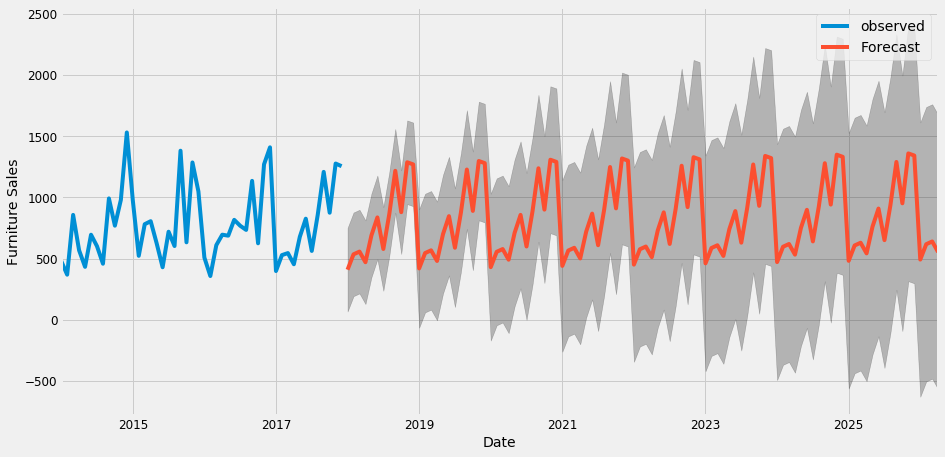

In [62]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
# Time Series of Furniture vs. Office Supplies

In [63]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']

furniture.shape, office.shape

((2121, 21), (6026, 21))

In [ ]:
# Data Exploration
# We are going to compare two categories’ sales in the same time period. 
# This means combine two data frames into one and plot these two categories’ time series into one plot.


In [65]:
cols = ['Row ID', 
        'Order ID', 
        'Ship Date', 
        'Ship Mode', 
        'Customer ID', 
        'Customer Name', 
        'Segment', 
        'Country', 
        'City', 
        'State', 
        'Postal Code', 
        'Region', 
        'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name', 
        'Quantity', 
        'Discount', 
        'Profit']

In [66]:
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

In [67]:
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')


In [68]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()


In [69]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')


In [70]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()


In [71]:
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})


In [72]:
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


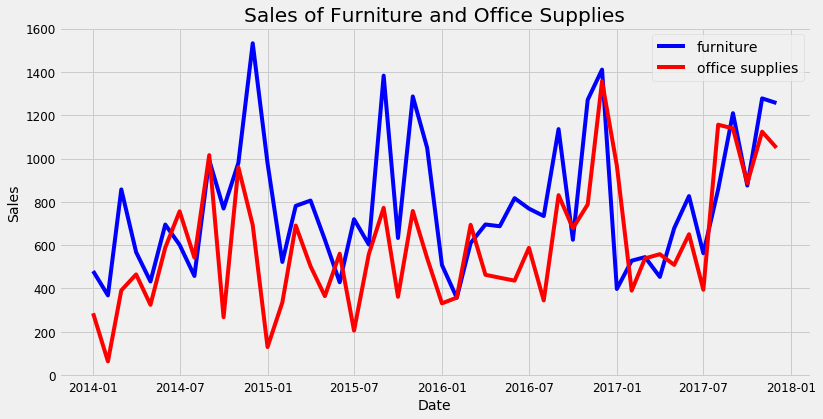

In [75]:
plt.figure(figsize=(12, 6))

plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')

plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();
plt.show()

In [ ]:
# I observe that sales of furniture and office supplies shared a similar seasonal pattern. 

# Early time of the year is the off season for both of the two categories. 

# It seems summer time is quiet for office supplies too. 

# in addition, average daily sales for furniture are higher than those of office supplies in most of the months. 

# It is understandable, as the value of furniture should be much higher than those of office supplies. 
# Occasionally, office supplies passed furniture on average daily sales. 

# I will find out when was the first time office supplies’ sales surpassed those of furniture’s.

In [76]:
first_date = store.ix[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']

print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.
